#Random Forest Classification

##Import Libraries


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Load the Dataset

In [42]:
df = pd.read_csv('heart.csv')

# Split the data into features (X) and target (y)

In [43]:
X = df.drop('target', axis=1)
y = df['target']

#Train-Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling (Optional for Decision Tree, but we include it for consistency)


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model


In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model and make Predication

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)


#EDA

# 1. Initial Data Exploration


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Create DataFrames for better visualization
df_train = pd.DataFrame(X_train, columns=[
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
])
df_test = pd.DataFrame(X_test, columns=df_train.columns)

print("Initial Data Overview")
print(df_train.describe())
print(df_train.info())
print(df_train.head())

Initial Data Overview
              age         sex          cp    trestbps        chol         fbs  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean    54.367073    0.700000    0.952439  131.724390  245.051220    0.146341   
std      9.166917    0.458537    1.039598   17.618454   49.668373    0.353664   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean     0.519512  149.351220    0.345122    1.040244    1.389024    0.751220   
std  

# 2. Feature Distribution Analysis Before Scaling


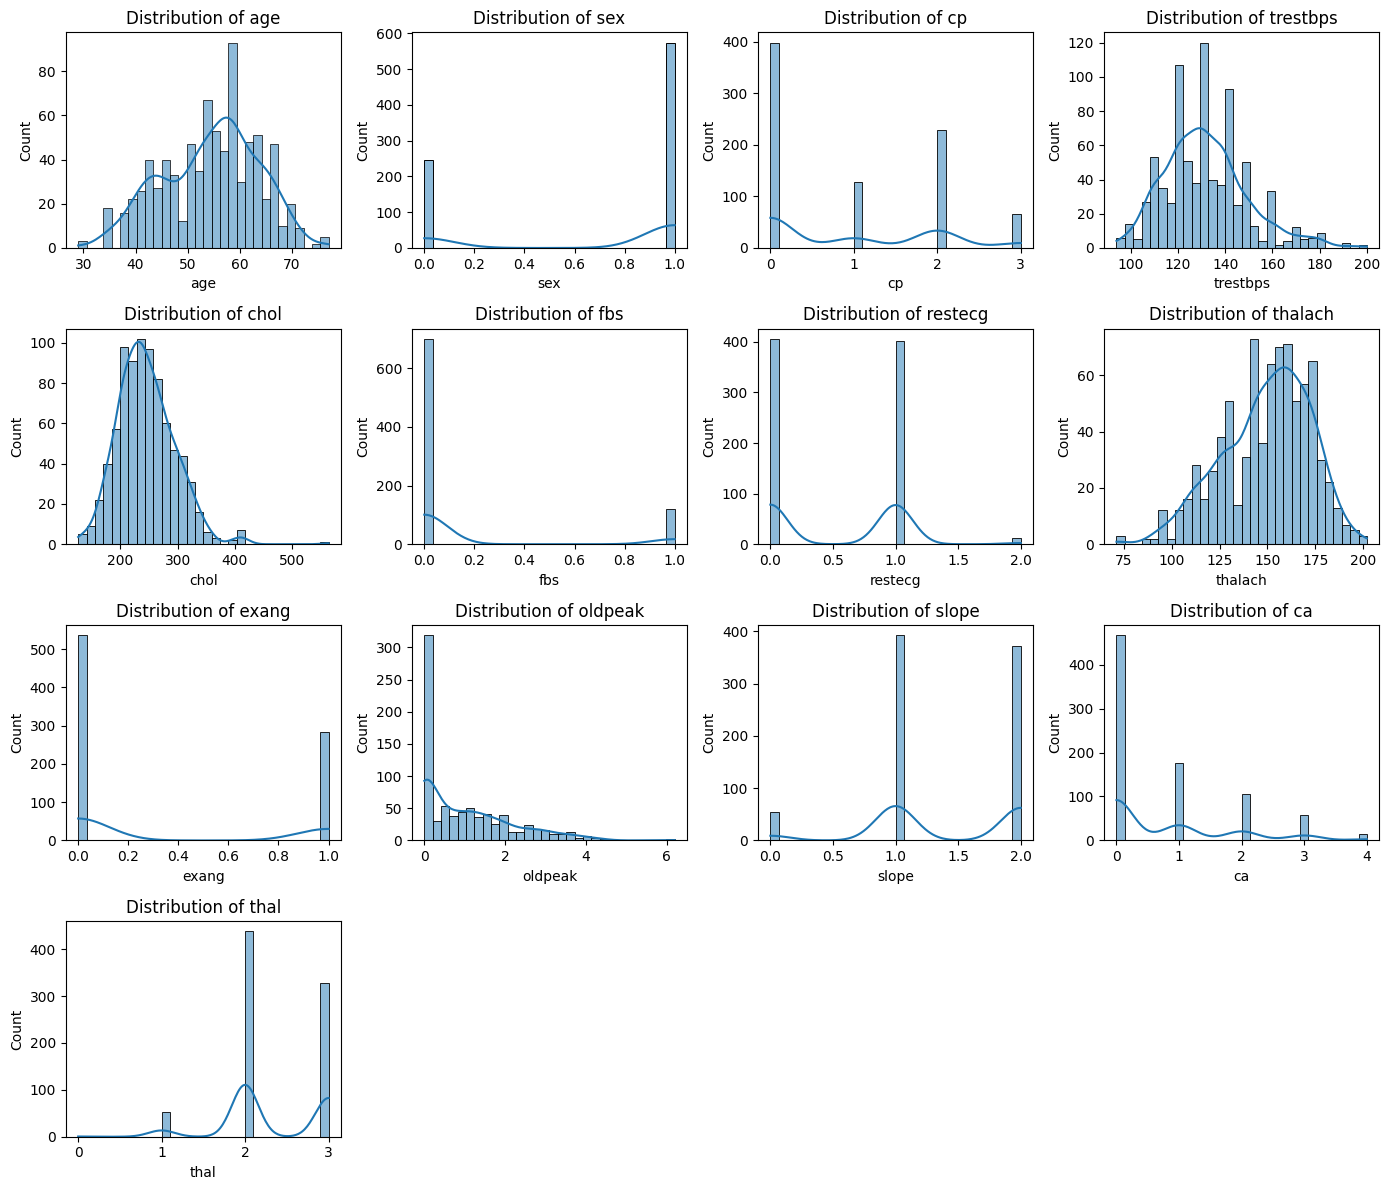

In [50]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(df_train.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# 3. Apply Feature Scaling


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create DataFrames for scaled data


In [52]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=df_train.columns)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=df_train.columns)



# Plot feature distributions after scaling


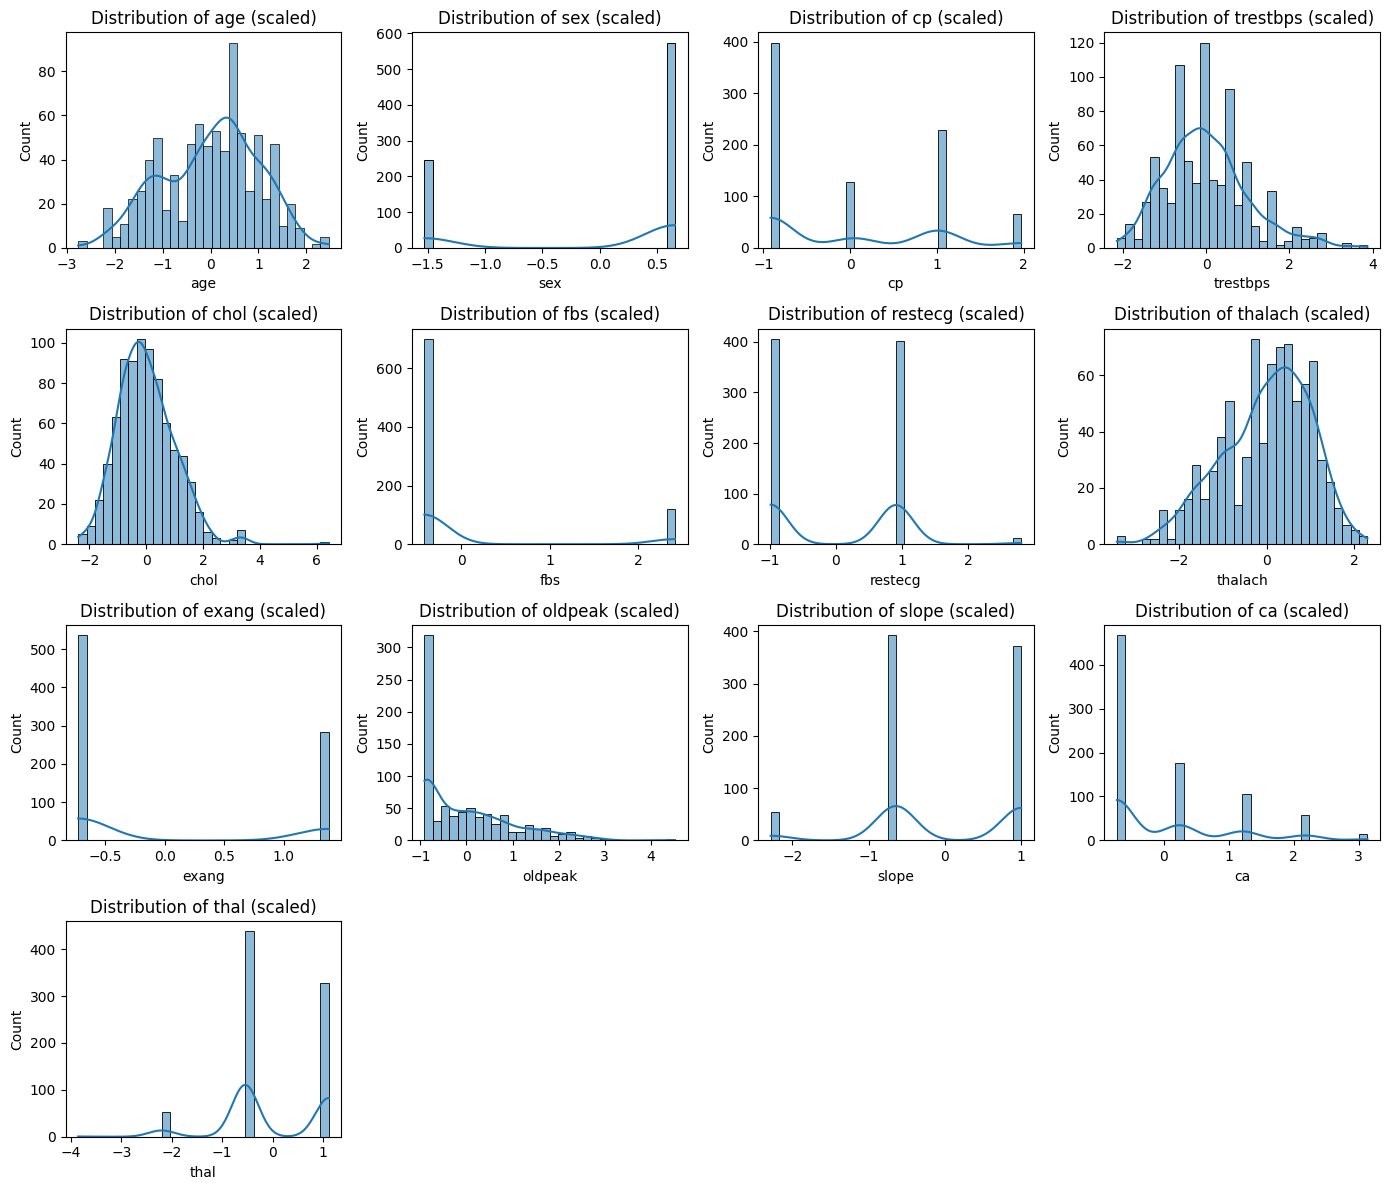

In [51]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(df_train_scaled.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train_scaled[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (scaled)')
    plt.tight_layout()
plt.show()

# 4. Model Training and Evaluation



In [54]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation results
print("Model Performance")
print(f'Accuracy: {accuracy_rf:.2f}')
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)

Model Performance
Accuracy: 0.99
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



#Explanation of the EDA Steps
**Initial Data Exploration:**

**Descriptive Statistics:** Use describe() to get summary statistics for each feature.
Info and Head: Use info() to get data types and non-null counts, and head() to preview the first few rows.
Feature Distribution Analysis Before Scaling:

**Histograms with KDE**: Visualize the distribution of each feature before scaling to understand the range and spread of the feature values.
Feature Scaling (Optional for Random Forests):

**Scaling:** Apply StandardScaler to standardize features. While Random Forests are generally robust to unscaled features, it’s included here for consistency with other models.
Post-Scaling Histograms (Optional): Plot histograms of scaled features to confirm that they are centered around 0 with a standard deviation of 1.   
**Model Training and Evaluation:**

Initialize and Train Random Forest: Train a Random Forest model with 100 estimators.
Predict and Evaluate: Make predictions and evaluate the model's performance using accuracy, confusion matrix, and classification report.
Print Results: Display the evaluation metrics to assess how well the Random Forest model performs on the test data.
This EDA script provides a comprehensive analysis of the dataset and model, helping you understand the data distribution, the effect of scaling, and the performance of the Random Forest classifier.

#Visualizing Model Performance on Training and Testing Data



Training Accuracy: 1.00
Testing Accuracy: 0.99


<ipython-input-56-d861711f84fe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



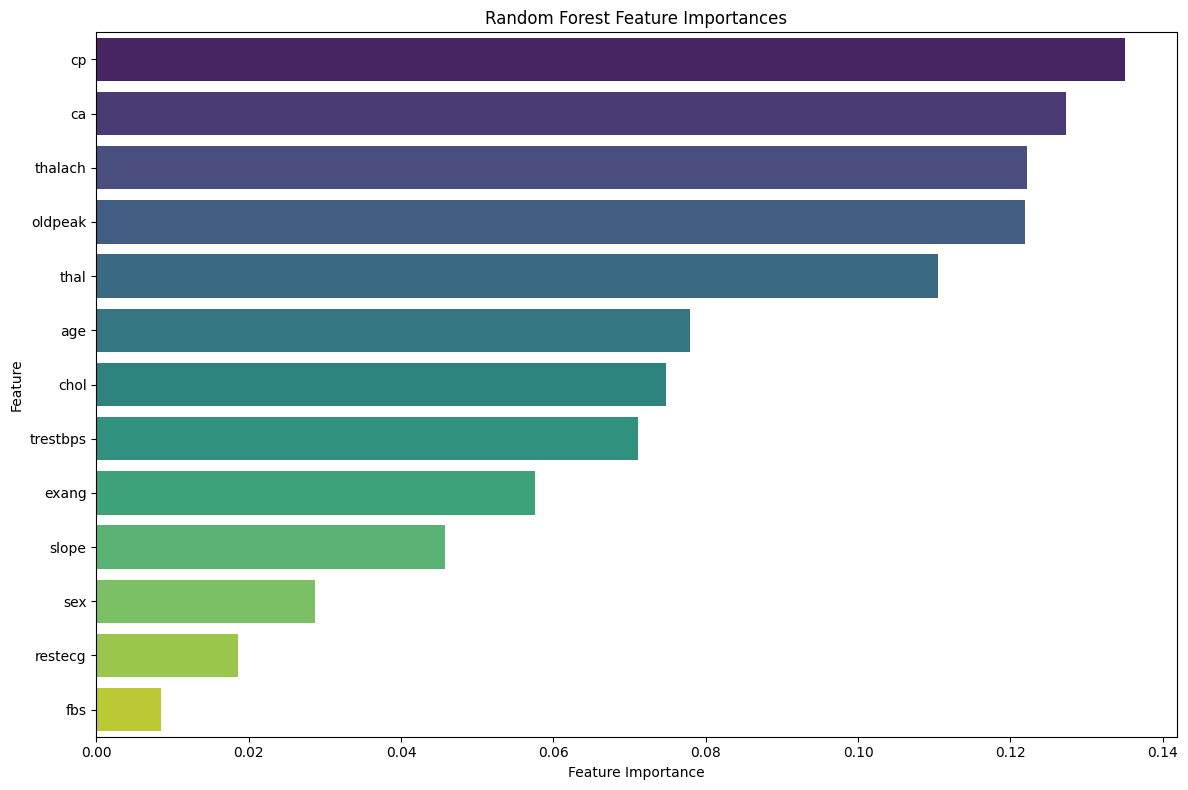

In [56]:
y_pred_train = rf_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f'\nTraining Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_rf:.2f}')

# Plotting feature importances for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importances')
sns.barplot(x=importances[indices], y=df.columns[indices], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Explanation of Visualizations**  
Feature Distribution Analysis Before Scaling:

Histograms for Training and Testing Sets: Overlaid histograms with KDE for both the training and testing sets to compare their distributions before scaling. This helps identify any discrepancies between the datasets.
Feature Distribution Analysis After Scaling:

Histograms for Scaled Training and Testing Sets: Overlaid histograms with KDE for the scaled training and testing datasets. This helps to confirm that scaling has standardized the features properly and allows for comparison between the scaled training and testing sets.
Model Performance Visualization:

Training vs. Testing Accuracy: Print and compare the accuracy of the model on both the training and testing sets to check for overfitting or underfitting.
Feature Importances for Random Forest:

Bar Plot of Feature Importances: Visualize the importance of each feature as determined by the Random Forest model. This shows which features have the most influence on the model's predictions.
These visualizations help you understand the distributions of features, the impact of scaling, and the performance of the model on both training and testing data. They also provide insights into feature importance, which can be valuable for model interpretation.